 Project name: Neuroscience-inspired facial mask recognition using MobileNet and computer vision in real-time video streaming

Preprocessing

Found 6043 images belonging to 2 classes.
Found 1510 images belonging to 2 classes.


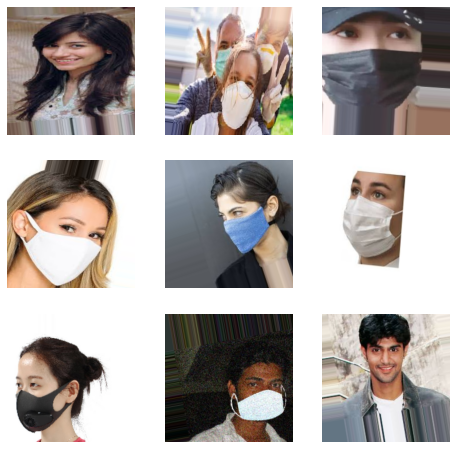

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set paths
data_dir = "D:/Data"  
batch_size = 32
img_size = (224, 224)  

# Step 1: Data Augmentation
data_augmentation = ImageDataGenerator(
    rescale=1.0 / 255.0,  
    rotation_range=20,    
    width_shift_range=0.2,  
    height_shift_range=0.2,  
    shear_range=0.2,      
    zoom_range=0.2,       
    horizontal_flip=True, 
    validation_split=0.2   
)

# Step 2: Load and Preprocess Training Data
train_data = data_augmentation.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",  # Binary classification (mask/no-mask)
    subset="training"
)

# Step 3: Load and Preprocess Validation Data
validation_data = data_augmentation.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",
    subset="validation"
)

# Check some images (optional)
import matplotlib.pyplot as plt

for images, labels in train_data:
    plt.figure(figsize=(8, 8))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.axis("off")
    break


Code for Training MobileNet / Model Training

In [2]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Step 1: Load Pre-trained MobileNetV2 Model
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Step 2: Add Custom Layers for Mask Detection
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
output = Dense(1, activation="sigmoid")(x)  # Binary classification: mask/no-mask

model = Model(inputs=base_model.input, outputs=output)

# Step 3: Freeze Base Layers (Optional)
for layer in base_model.layers:
    layer.trainable = False  # Freeze base layers during transfer learning

# Step 4: Compile the Model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="binary_crossentropy",  # Use binary crossentropy for binary classification
    metrics=["accuracy"]
)

# Step 5: Train the Model
epochs = 10
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=epochs,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    validation_steps=validation_data.samples // validation_data.batch_size
)

# Step 6: Save the Trained Model
model.save("mask_detection_model.h5")


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 11s 1us/step
Epoch 1/10


C:\Users\ssuun\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


120/188 ━━━━━━━━━━━━━━━━━━━━ 1:04 955ms/step - accuracy: 0.8250 - loss: 0.3865

C:\Users\ssuun\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


188/188 ━━━━━━━━━━━━━━━━━━━━ 237s 1s/step - accuracy: 0.8623 - loss: 0.3194 - val_accuracy: 0.9707 - val_loss: 0.0999
Epoch 2/10
  1/188 ━━━━━━━━━━━━━━━━━━━━ 1:53 608ms/step - accuracy: 0.9375 - loss: 0.1517

C:\Users\ssuun\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9375 - loss: 0.0762 - val_accuracy: 1.0000 - val_loss: 0.0151
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 198s 1s/step - accuracy: 0.9761 - loss: 0.0799 - val_accuracy: 0.9754 - val_loss: 0.0766
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 815us/step - accuracy: 0.9688 - loss: 0.0247 - val_accuracy: 1.0000 - val_loss: 0.0077
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 214s 1s/step - accuracy: 0.9815 - loss: 0.0586 - val_accuracy: 0.9754 - val_loss: 0.0695
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 733us/step - accuracy: 0.9688 - loss: 0.0188 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 217s 1s/step - accuracy: 0.9821 - loss: 0.0546 - val_accuracy: 0.9761 - val_loss: 0.0749
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 954us/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 1.0000 - val_loss: 0.0387
Epoch 9/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 216s 1s/step - accuracy: 0.9868 - loss: 0.0436 - val_accuracy: 0.9

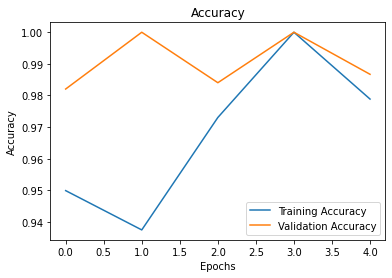

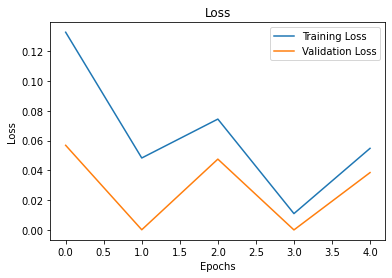

In [9]:
import matplotlib.pyplot as plt

# Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


Fine-Tuning the Model

Once the custom classifier is trained, you can unfreeze some of the earlier layers for fine-tuning. This helps the model adapt better to your specific dataset.

In [7]:
# Step 5: Unfreeze Some Layers for Fine-Tuning
for layer in base_model.layers[-50:]:  # Unfreeze the last 50 layers
    layer.trainable = True

# Recompile the Model with a Lower Learning Rate for Fine-Tuning
model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Lower learning rate for fine-tuning
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# Step 6: Train the Fine-Tuned Model
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=5,  # Fine-tuning for fewer epochs
    steps_per_epoch=train_data.samples // train_data.batch_size,
    validation_steps=validation_data.samples // validation_data.batch_size
)


Epoch 1/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 264s 1s/step - accuracy: 0.9240 - loss: 0.1862 - val_accuracy: 0.9820 - val_loss: 0.0568
Epoch 2/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9375 - loss: 0.0486 - val_accuracy: 1.0000 - val_loss: 1.7084e-04
Epoch 3/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 378s 2s/step - accuracy: 0.9723 - loss: 0.0771 - val_accuracy: 0.9840 - val_loss: 0.0476
Epoch 4/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 1.0000 - loss: 0.0111 - val_accuracy: 1.0000 - val_loss: 6.2740e-05
Epoch 5/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 404s 2s/step - accuracy: 0.9779 - loss: 0.0533 - val_accuracy: 0.9867 - val_loss: 0.0385


Visualizing Training Performance

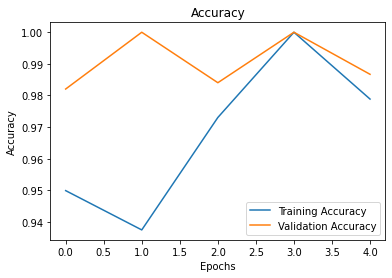

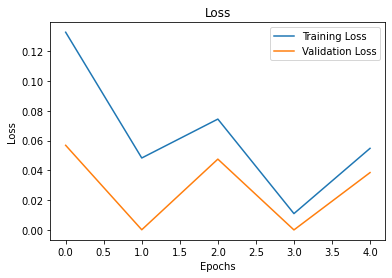

In [8]:
import matplotlib.pyplot as plt

# Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


Code for Real-Time Video Streaming

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Step 1: Load the Trained Model
model = load_model("mask_detection_model.h5")  

# Step 2: Define Function to Preprocess Frames
def preprocess_frame(frame):
    img = cv2.resize(frame, (224, 224))  
    img = img / 255.0 
    img = np.expand_dims(img, axis=0)  
    return img

# Step 3: Initialize Webcam
cap = cv2.VideoCapture(0)  

if not cap.isOpened():
    print("Error: Could not access the webcam.")
    exit()

# Step 4: Real-Time Detection Loop
while True:
    ret, frame = cap.read()  
    if not ret:
        print("Error: Could not read frame.")
        break

    # Preprocess the frame for prediction
    preprocessed_frame = preprocess_frame(frame)

    # Make predictions
    prediction = model.predict(preprocessed_frame)[0][0]  
    label = "Mask" if prediction < 0.5 else "No Mask"  # Threshold of 0.5
    color = (0, 255, 0) if label == "Mask" else (0, 0, 255)  # Green for mask, red for no mask

    # Display the label on the frame
    cv2.putText(frame, f"{label} ({prediction:.2f})", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
    cv2.rectangle(frame, (0, 0), (frame.shape[1], frame.shape[0]), color, 5)  

    # Show the frame
    cv2.imshow("Mask Detection", frame)

    # Exit the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Step 5: Release Resources
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━


Enhance the real-time mask detection script by incorporating face detection. We'll use OpenCV's Haar Cascade face detector to detect faces in the frame and apply the mask detection model to these regions.

Code with Face Detection

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Step 1: Load the Trained Mask Detection Model
model = load_model("mask_detection_model.h5")  # Replace with your model path

# Step 2: Load Haar Cascade for Face Detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Step 3: Define Function to Preprocess Face Regions
def preprocess_frame(face):
    img = cv2.resize(face, (224, 224))  # Resize to MobileNet input size
    img = img / 255.0  # Normalize pixel values to [0, 1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Step 4: Initialize Webcam
cap = cv2.VideoCapture(0)  # Use 0 for the default webcam

if not cap.isOpened():
    print("Error: Could not access the webcam.")
    exit()

# Step 5: Real-Time Detection Loop
while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Could not read frame.")
        break

    # Convert frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(100, 100))

    for (x, y, w, h) in faces:
        # Extract the face region
        face = frame[y:y + h, x:x + w]

        # Preprocess the face for mask detection
        preprocessed_face = preprocess_frame(face)

        # Predict mask/no-mask
        prediction = model.predict(preprocessed_face)[0][0]
        label = "Mask" if prediction < 0.5 else "No Mask"
        color = (0, 255, 0) if label == "Mask" else (0, 0, 255)  # Green for mask, red for no mask

        # Draw rectangle around the face
        cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
        
        # Display label and confidence score
        cv2.putText(frame, f"{label} ({prediction:.2f})", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

    # Show the frame
    cv2.imshow("Mask Detection with Face Detection", frame)

    # Exit the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Step 6: Release Resources
cap.release()
cv2.destroyAllWindows()






Optional Enhancements:

Sound Alert for No Mask: Add an audio alert when "No Mask" is detected:



In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import winsound  # For sound alerts

# Step 1: Load the Trained Mask Detection Model
model = load_model("mask_detection_model.h5")  # Replace with your model path

# Step 2: Load Haar Cascade for Face Detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Step 3: Define Function to Preprocess Face Regions
def preprocess_frame(face):
    img = cv2.resize(face, (224, 224))  # Resize to MobileNet input size
    img = img / 255.0  # Normalize pixel values to [0, 1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Step 4: Initialize Webcam
cap = cv2.VideoCapture(0)  # Use 0 for the default webcam

if not cap.isOpened():
    print("Error: Could not access the webcam.")
    exit()

# Step 5: Real-Time Detection Loop
while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Could not read frame.")
        break

    # Convert frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(100, 100))

    for (x, y, w, h) in faces:
        # Extract the face region
        face = frame[y:y + h, x:x + w]

        # Preprocess the face for mask detection
        preprocessed_face = preprocess_frame(face)

        # Predict mask/no-mask
        prediction = model.predict(preprocessed_face)[0][0]
        label = "Mask" if prediction < 0.5 else "No Mask"
        color = (0, 255, 0) if label == "Mask" else (0, 0, 255)  # Green for mask, red for no mask

        # Draw rectangle around the face
        cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
        
        # Display label and confidence score
        cv2.putText(frame, f"{label} ({prediction:.2f})", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

        # Add Sound Alert for "No Mask"
        if label == "No Mask":
            winsound.Beep(1000, 500)  # Beep at 1000 Hz for 500 ms

    # Show the frame
    cv2.imshow("Mask Detection with Face Detection", frame)

    # Exit the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Step 6: Release Resources
cap.release()
cv2.destroyAllWindows()
